<a href="https://colab.research.google.com/github/Sanjiwani1wadhave/Assignment-15/blob/main/random_forest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
company=pd.read_csv("Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
company.shape

(400, 11)

In [ ]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


**One Hot Encoding**

In [ ]:
# One-hot encode the data using pandas get_dummies
company=pd.get_dummies(company)
# Display the first five rows of the last 11 columns
company.iloc[:,5:].head(5)

,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,120,42,17,1,0,0,0,1,0,1
1,83,65,10,0,1,0,0,1,0,1
2,80,59,12,0,0,1,0,1,0,1
3,97,55,14,0,0,1,0,1,0,1
4,128,38,13,1,0,0,0,1,1,0


**Visualization**

In [ ]:
# Use numpy to convert to arrays
import numpy as np


In [ ]:
# Labels are the values we want to predict
labels = np.array(company['Price'])

In [ ]:
# Remove the labels from the company
np.company= company.drop('Price', axis = 1)

In [ ]:
# Saving company names for later use
company_list = list(company.columns)

In [ ]:
# Convert to numpy array
company = np.array(company)

**Training and Testing Sets**

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
train_company, test_company, train_labels, test_labels = train_test_split(company,labels, test_size=0.2, random_state=42 )

In [ ]:
print('Training company Shape:', train_company.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing company Shape:', test_company.shape)
print('Testing Labels Shape:', test_labels.shape)

Training company Shape: (320, 15)
Training Labels Shape: (320,)
Testing company Shape: (80, 15)
Testing Labels Shape: (80,)


**Establish Baseline**

In [ ]:
# The baseline predictions are the historical averages
baseline_preds = test_company[:, company_list.index('ShelveLoc_Bad')]

In [ ]:
# Baseline errors, and display ShelveLoc_Good baseline error
baseline_errors=abs(baseline_preds-test_labels)

In [ ]:
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  114.25


# **Train Model**

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from pandas.core.common import random_state
# Instantiate model with 1000 decision trees
rf=RandomForestRegressor(n_estimators=1000,random_state=42)

In [ ]:
# Train the model on training data
rf.fit(train_company, train_labels);

# **Make Predictions on the Test Set**

In [ ]:
# Use the forest's predict method on the test data
predictions=rf.predict(test_company)

In [ ]:
# Calculate the absolute errors
errors=abs(predictions-test_labels)

In [ ]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.57


Our average estimate is off by 0.57

# **Determine Performance metrics**

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

In [ ]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.29 %.


That looks pretty good! Our model has learned how to predict the maximum sales with 98% accuracy.

**Visualiazing the Single Decision Tree**

In [ ]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [ ]:
# Pull out one tree from the forest
tree = rf.estimators_[5]

In [ ]:
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = company_list, rounded = True, precision = 1)

In [ ]:
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

In [ ]:
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:
# importing pyplot and image from matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img

In [ ]:
# reading png image file
im = img.imread('tree.png')

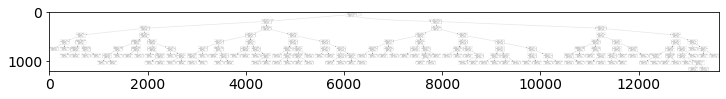

In [ ]:
# show image
plt.imshow(im)

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_company, train_labels)

RandomForestRegressor(max_depth=3, n_estimators=10)

In [ ]:
# Extract the small tree
tree_small = rf_small.estimators_[5]

In [ ]:
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = company_list, rounded = True, precision = 1)

In [ ]:
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')

In [ ]:
graph= graph.write_png('small_tree.png');

In [ ]:
# importing pyplot and image from matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img

In [ ]:
# reading png image file
im = img.imread('small_tree.png')

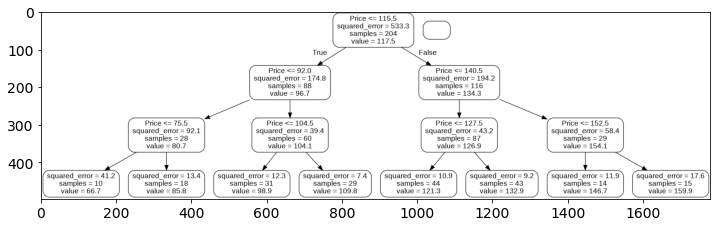

In [ ]:
#show image
plt.imshow(im)